In [16]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [25]:
# device config
device = torch.device('cuda' if  torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [41]:
# hyperparameters
input_size = 784 #28 x 28
hidden_size = 100
num_classes =10
num_epochs=2
batch_size=100
learning_rate = 0.001


In [42]:
#MNIST

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(),download=True)

test_dataset =  torchvision.datasets.MNIST(root= './data', train=False, transform=transforms.ToTensor())

train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [43]:
examples = iter(train_dataloader)
samples,labels = next(examples)

print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


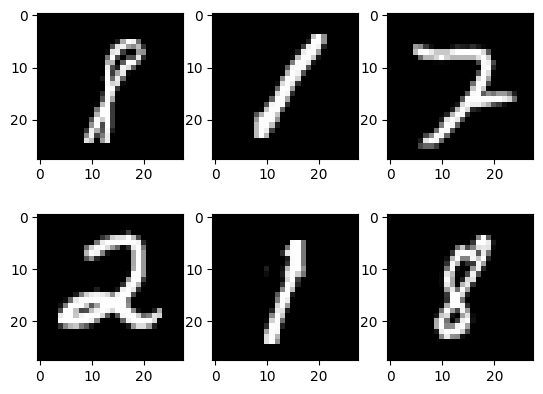

In [44]:
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(samples[i][0], cmap='gray')

plt.show()

In [45]:
# neural network

class NeuralNet(nn.Module):
  def __init__(self, input_size,hidden_size, num_classes):
    super(NeuralNet, self).__init__()

    # designing our architecture
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2= nn.Linear(hidden_size,num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = NeuralNet(input_size, hidden_size, num_classes)


In [46]:
#loss and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criterion.to(device)
model.to(device)

NeuralNet(
  (l1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=100, out_features=10, bias=True)
)

In [47]:
#training loop

n_total_steps = len(train_dataloader)
for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_dataloader):
    # current shape is 100,1,28,28
    # we need 100, 784
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs,labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(i+1)%100==0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss= {loss.item():.4f}')

#testig and evaluation
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_dataloader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    # values, index
    _, predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc= 100.0 * n_correct/n_samples
  print(f'accuracy = {acc}')




epoch 1 / 2, step 100/600, loss= 0.3266
epoch 1 / 2, step 200/600, loss= 0.3478
epoch 1 / 2, step 300/600, loss= 0.2564
epoch 1 / 2, step 400/600, loss= 0.2985
epoch 1 / 2, step 500/600, loss= 0.1221
epoch 1 / 2, step 600/600, loss= 0.1230
epoch 2 / 2, step 100/600, loss= 0.1335
epoch 2 / 2, step 200/600, loss= 0.1426
epoch 2 / 2, step 300/600, loss= 0.2581
epoch 2 / 2, step 400/600, loss= 0.2005
epoch 2 / 2, step 500/600, loss= 0.1326
epoch 2 / 2, step 600/600, loss= 0.1208
accuracy = 95.13
